In [ ]:
# Stock Trading Nasdaq Project - Team 3

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import json
from pathlib import Path
import nasdaqdatalink
import matplotlib.pyplot as plt
import statistics

In [ ]:
# Collects the user's input for the prompt "What Stock should we search for?"
# name = input("What Stock should we search for? ")
# date = input("What search start date should we use ?")

In [2]:
# Use Pandas Nasdaq Data Link to get stock data

GOOG_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['GOOG'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(GOOG_stock)} rows of data.")

# Export the Data into a csv
GOOG_stock.to_csv("output_data/GOOG_stock.csv")

# Display sample data
#GOOG_stock.head()

Downloaded 250 rows of data.


In [3]:
# Use Pandas Nasdaq Data Link to get stock data

META_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['META'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(META_stock)} rows of data.")

# Export the Data into a csv
META_stock.to_csv("output_data/META_stock.csv")

# Display sample data
#META_stock.head()

Downloaded 250 rows of data.


In [4]:
# Use Pandas Nasdaq Data Link to get stock data

MSFT_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSFT'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSFT_stock)} rows of data.")

# Export the Data into a csv
MSFT_stock.to_csv("output_data/MSFT_stock.csv")

# Display sample data
#MSFT_stock.head()

Downloaded 250 rows of data.


In [5]:
# Use Pandas Nasdaq Data Link to get stock data

MSTR_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSTR'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSTR_stock)} rows of data.")

# Export the Data into a csv
MSTR_stock.to_csv("output_data/MSTR_stock.csv")

# Display sample data
#MSTR_stock.head()

Downloaded 250 rows of data.


In [6]:
# Use Pandas Nasdaq Data Link to get stock data

AAPL_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['AAPL'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(AAPL_stock)} rows of data.")

# Export the Data into a csv
AAPL_stock.to_csv("output_data/AAPL_stock.csv")

# Display sample data
#AAPL_stock.head()

Downloaded 250 rows of data.


In [7]:
# Use Pandas Nasdaq Data Link to get stock data

MNDY_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MNDY'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MNDY_stock)} rows of data.")

# Export the Data into a csv
MNDY_stock.to_csv("output_data/MNDY_stock.csv")

# Display sample data
#MNDY_stock.head()

Downloaded 250 rows of data.


In [8]:
# Use Pandas Nasdaq Data Link to get stock data

TEAM_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['TEAM'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(TEAM_stock)} rows of data.")

# Export the Data into a csv
TEAM_stock.to_csv("output_data/TEAM_stock.csv")

Downloaded 250 rows of data.


In [9]:
#Change Date Order
GOOG_date = GOOG_stock.sort_values(by="date").reset_index()
META_date = META_stock.sort_values(by="date").reset_index()
MSFT_date = MSFT_stock.sort_values(by="date").reset_index()
MSTR_date = MSTR_stock.sort_values(by="date").reset_index()
AAPL_date = AAPL_stock.sort_values(by="date").reset_index()
MNDY_date = MNDY_stock.sort_values(by="date").reset_index()
TEAM_date = TEAM_stock.sort_values(by="date").reset_index()

In [10]:
GOOG_date.head()

,None,ticker,date,open,high,low,close,volume
0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


In [11]:
#Define the Company Names and Lists for Project
GOOG = GOOG_date
META = META_date
MSFT = MSFT_date
MSTR = MSTR_date
AAPL = AAPL_date
MNDY = MNDY_date
TEAM = TEAM_date

company_list = [GOOG, META, MSFT, MSTR, AAPL, MNDY, TEAM]
company_name = ['GOOG', 'META', 'MSFT','MSTR', 'AAPL', 'MNDY', 'TEAM']

In [12]:
#Merge to a single DataFrame and export
for company, ticker in zip(company_list, company_name):
    company["company_name"] = ticker
    
df = pd.concat(company_list, axis=0)
df.head()

,None,ticker,date,open,high,low,close,volume,company_name
0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0,GOOG
1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0,GOOG
2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0,GOOG
3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0,GOOG
4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0,GOOG


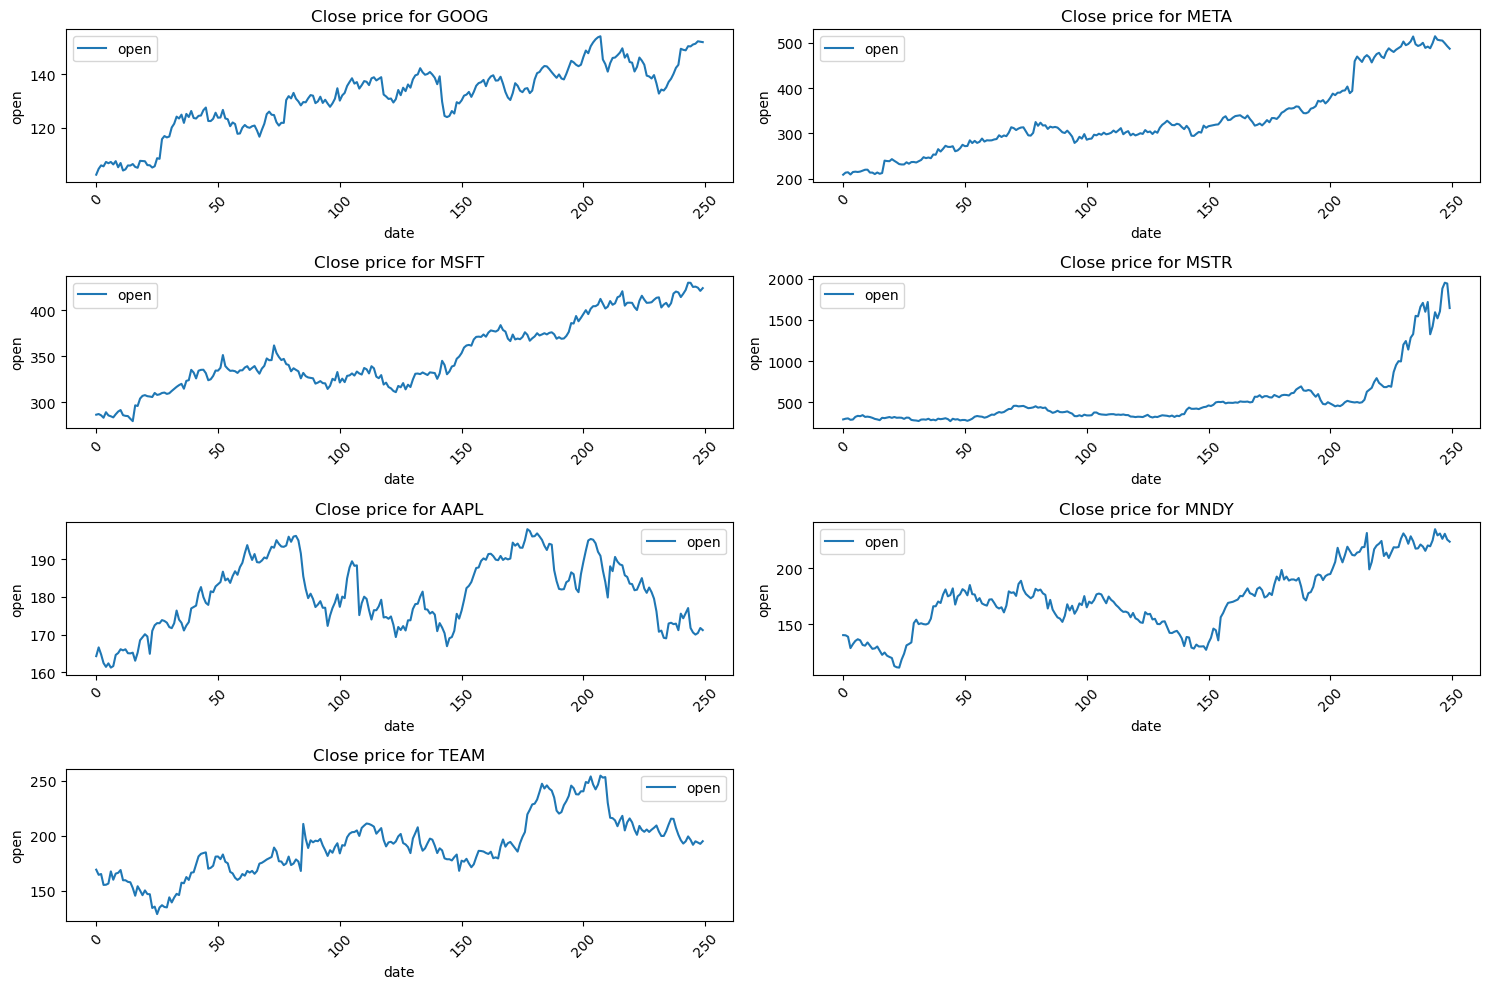

In [17]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['open'].plot()
    plt.ylabel('open')
    plt.xlabel('date')
    plt.title(f"Close price for {company_name[i - 1]}")
    plt.legend()
    plt.xticks(rotation=45)
    
plt.tight_layout()

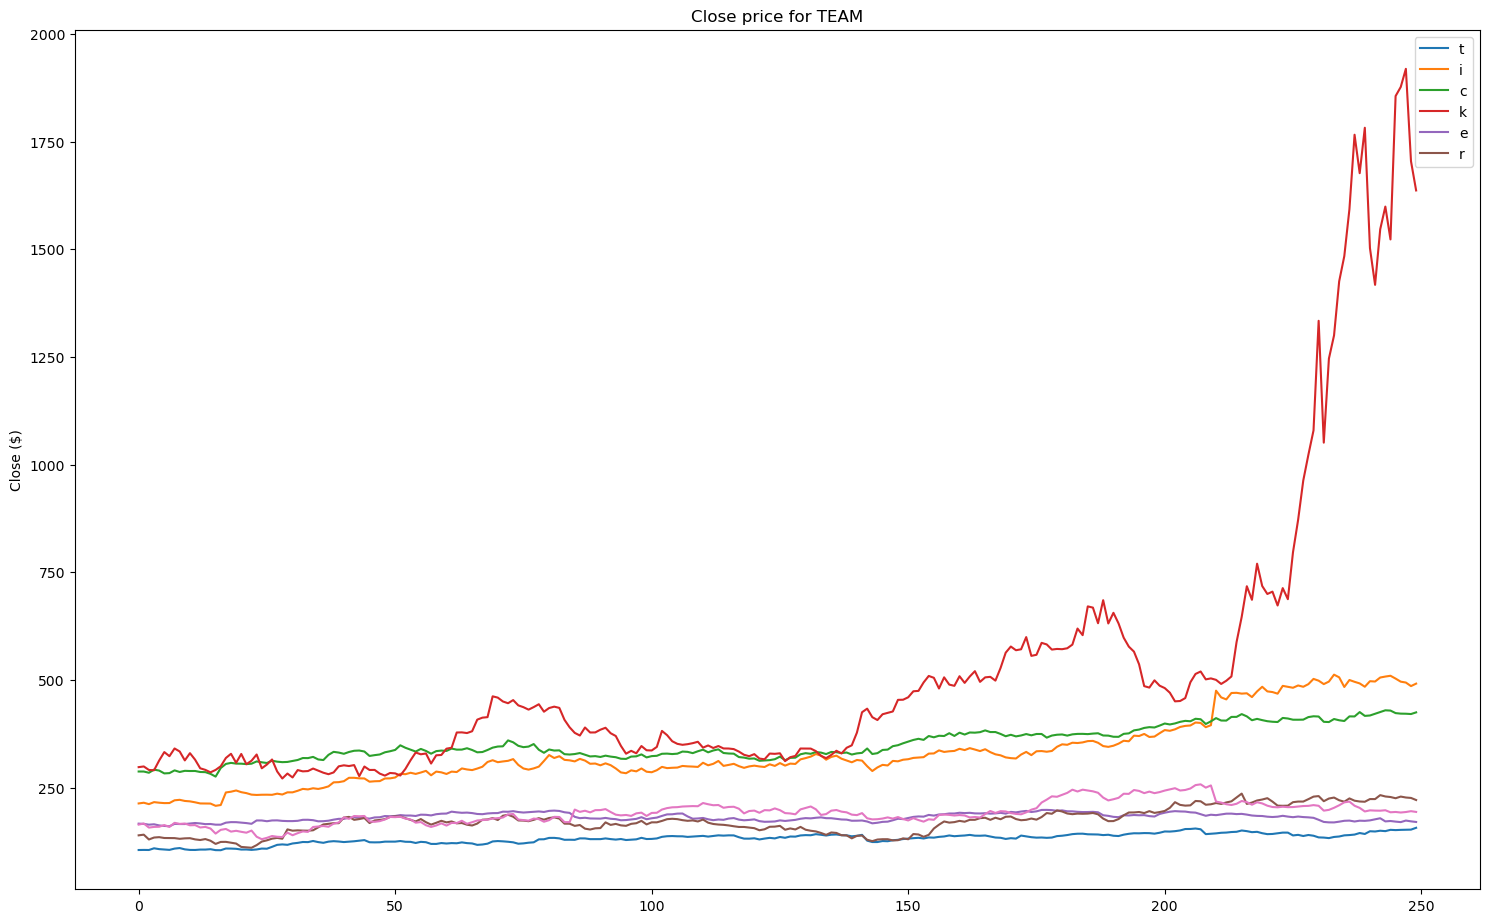

In [14]:
# Let's see a historical view of the closing price on single chart
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    company['close'].plot()
    plt.ylabel('Close ($)')
    plt.title(f"Close price for {company_name[i - 1]}")
    plt.legend('ticker')
    
plt.tight_layout()

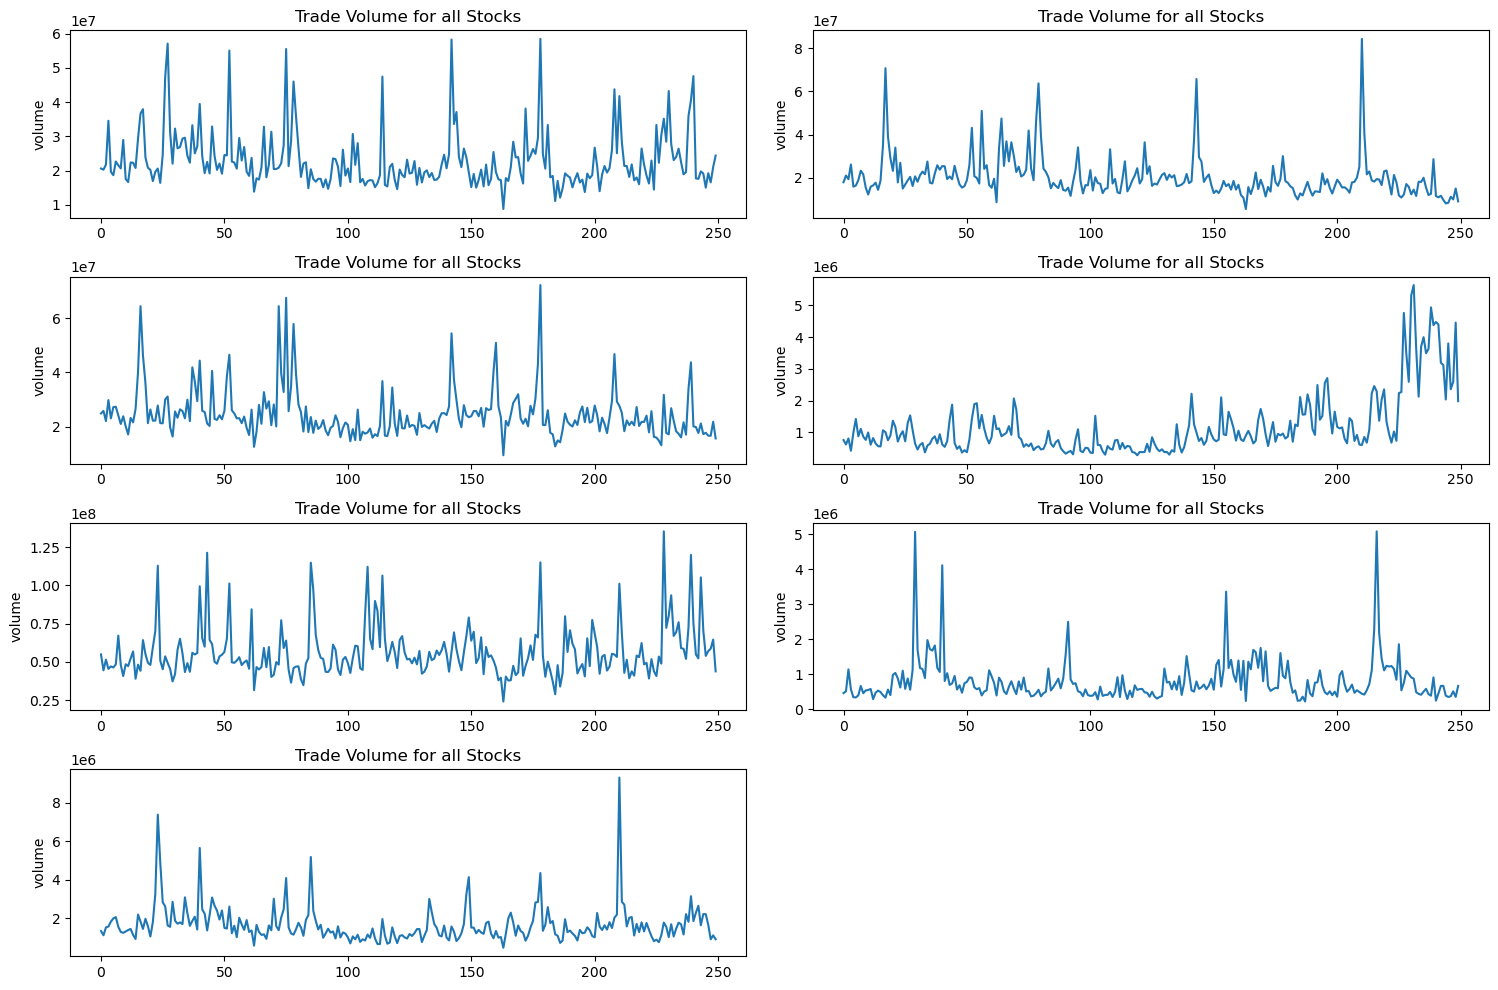

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Trade Volume for all Stocks")
    
plt.tight_layout()

In [ ]:
#Print box plot for each stock


In [19]:
#Cereate data frame for each Ticker for % Change, 
GOOG_close_change = GOOG_stock.groupby(['ticker'])['open'].pct_change(-1)
GOOG_close_change.head()

None
0   -0.001118
1   -0.000953
2    0.005984
3    0.001921
4    0.004726
Name: open, dtype: float64